In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega a tabela imortação
imp_fert=pd.read_csv('/home/andre301267/git/Pricing-Fertilizer/DB/temp/imp_fert_ncm.csv')
imp_fert.head(1)

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,UF,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,VL_FRETE,VL_SEGURO
0,1997,12,31042090,10,23,RS,1,1015400,7130535,7130535,922261,85567,1935


# Anos, meses

In [2]:
%run '/home/andre301267/git/Pricing-Fertilizer/codes/function/Comexstat/verifica_continuidade_tempo.ipynb'

***Função "verifica_continuidade_tempo(comexstat_tab)" disponível***


In [3]:
verifica_continuidade_tempo(imp_fert)

A tabela apresenta todos os anos entre 1997 e 2024.
A tabela apresenta continuidade entre os meses.
As datas vão de 1/1997 a 8/2024.


### Escalona bimestre, trimestre, quadrimestre e semestre

# Carrega tabelas auxiliares

In [4]:
%run '/home/andre301267/git/Pricing-Fertilizer/codes/function/Comexstat/extrai-tab_complementares.ipynb'

In [178]:
imp_fert=imp_fert.rename(columns={'SG_UF_NCM':'uf'})

uf=uf.rename(columns={'SG_UF':'UF'})

In [179]:
via.columns

Index(['CO_VIA', 'NO_VIA'], dtype='object')

In [180]:
t=[ncm, ncm_sh, pais, uf, via, urf]
for y in t:
    imp_fert=imp_fert.merge(y)

# Descarta colunas sem interesse

In [181]:
# List of strings to check
strings_to_exclude = ['ING','ESP','ESP','SEC','PPE','PPI','FAT','CICI','CGCE','SIIT','ISIC','EXP','ISON','SG_UNID']

# Function to check if any of the strings are in the column name
def should_exclude(column_name, strings):
    return any(s in column_name for s in strings)

# Exclude columns whose names contain any of the strings
imp_fert = imp_fert.loc[:, ~imp_fert.columns.to_series().apply(lambda col_name: should_exclude(col_name, strings_to_exclude))]

print(imp_fert.columns)


Index(['CO_ANO', 'CO_MES', 'CO_NCM', 'CO_UNID', 'CO_PAIS', 'UF', 'CO_VIA',
       'CO_URF', 'QT_ESTAT', 'KG_LIQUIDO', 'VL_FOB', 'VL_FRETE', 'VL_SEGURO',
       'CO_SH6', 'CO_CUCI_ITEM', 'NO_NCM_POR', 'NO_SH6_POR', 'CO_SH4',
       'NO_SH4_POR', 'CO_SH2', 'NO_SH2_POR', 'CO_PAIS_ISOA3', 'NO_PAIS',
       'CO_UF', 'NO_UF', 'NO_REGIAO', 'NO_VIA', 'NO_URF'],
      dtype='object')


# Verifica NCM

In [182]:
g=imp_fert.groupby('CO_NCM').KG_LIQUIDO.count().reset_index().rename(columns={'KG_LIQUIDO':'#'}).sort_values(by='#',ascending=False)
g

,CO_NCM,#
25,31042090,18204
1,31021010,11782
3,31022100,10622
35,31054000,10346
31,31052000,6619
41,31059090,5256
37,31055900,4341
30,31051000,4103
11,31026000,3367
14,31029000,2631


In [183]:
import seaborn as sns

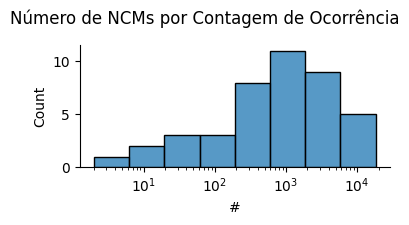

In [184]:
sns.displot(data=g,x='#',log_scale=True,height=2,aspect=2).fig.suptitle('Número de NCMs por Contagem de Ocorrência',y=1.1)
plt.show()

In [185]:
g[g['#']>10**4].merge(ncm[['CO_NCM','NO_NCM_POR']])

,CO_NCM,#,NO_NCM_POR
0,31042090,18204,Outros cloretos de potássio
1,31021010,11782,"Ureia, mesmo em solução aquosa, com teor de ni..."
2,31022100,10622,Sulfato de amônio
3,31054000,10346,Diidrogeno-ortofosfato de amônio (fosfato mono...


Elimina NCM pouco usado

In [186]:
g=g[g['#']>100]
imp_fert=imp_fert.merge(g[['CO_NCM']].drop_duplicates())

# Filtra SH4

In [187]:
col_foco=['CO_SH2','CO_SH4','NO_SH4_POR']
imp_fert.groupby(by=col_foco).KG_LIQUIDO.count()\
.reset_index().sort_values(by='KG_LIQUIDO', ascending=False).rename(columns={'KG_LIQUIDO':'#registros'})\
.set_index(col_foco)

#registros
CO_SH2 CO_SH4 NO_SH4_POR                                                    
31     3102   Adubos (fertilizantes) minerais ou químicos, az...       35625
       3105   Adubos (fertilizantes) minerais ou químicos, co...       35572
       3104   Adubos (fertilizantes) minerais ou químicos, po...       23875
       3103   Adubos (fertilizantes) minerais ou químicos, fo...        6216
       3101   Adubos (fertilizantes) de origem animal ou vege...        2169

In [188]:
imp_fert=imp_fert[imp_fert.CO_SH4!=3101]

# Filtra SH6

In [189]:
col_foco=['CO_SH2','CO_SH4','CO_SH6','NO_SH6_POR']
count_sh6=imp_fert.groupby(by=col_foco).KG_LIQUIDO.count()\
.reset_index().sort_values(by='KG_LIQUIDO', ascending=False).rename(columns={'KG_LIQUIDO':'#registros'})\
.set_index(col_foco)
count_sh6

#registros
CO_SH2 CO_SH4 CO_SH6 NO_SH6_POR                                                    
31     3104   310420 Cloreto de potássio para uso como fertilizante           19499
       3102   310210 Ureia, mesmo em solução aquosa                           13262
              310221 Sulfato de amônio                                        10622
       3105   310540 Diidrogeno-ortofosfato de amônio, inclusive mis...       10346
              310520 Adubos ou fertilizantes contendo nitrogênio, fó...        6619
              310590 Outros adubos ou fertilizantes minerais ou quím...        5994
              310559 Outros adubos ou fertilizantes minerais ou quím...        4341
              310510 Adubos ou fertilizantes em tabletes ou em embal...        4103
       3103   310310 Superfosfatos                                             3478
       3102   310260 Sais duplos e misturas de nitratos de cálcio e ...        3367
       3104   310430 Sulfato de potássio                                       2805
       3102   310290 Outros adubos ou fertilizantes minerais ou quím...        2631
              310250 Nitrato de sódio                                          2328
              310230 Nitrato de amônio, mesmo em solução aquosa                2241
       3105   310560 Adubos ou fertilizantes contendo fósforo e potá...        1811
              310530 Hidrogeno-ortofosfato de diamônio                         1802
       3104   310490 Outros adubos ou fertilizantes minerais ou quím...        1571
       3103   310311 Superfosfatos, que contenham, em peso, 35 % ou ...        1172
              310319 Outros superfosfatos                                      1163
       3102   310240 Misturas de nitrato de amônio com carbonato de ...         855
       3105   310551 Adubos ou fertilizantes contendo nitrato e fosfato         556
       3103   310390 Outros adubos ou fertilizantes minerais ou quím...         403
       3102   310229 Outros sais duplos e misturas de sulfato e nitr...         161
              310280 Misturas de ureia com nitrato de amônio, em sol...         158

In [190]:
imp_fert=imp_fert[~imp_fert.CO_SH6.isin([310410,310270,310240,310510])]

In [191]:
col_foco=['CO_SH2','CO_SH4','CO_SH6','CO_NCM','NO_NCM_POR']
count_ncm=imp_fert.groupby(by=col_foco).KG_LIQUIDO.count()\
.reset_index().sort_values(by='KG_LIQUIDO', ascending=False).rename(columns={'KG_LIQUIDO':'#registros'})\
.set_index(col_foco)
count_ncm

#registros
CO_SH2 CO_SH4 CO_SH6 CO_NCM   NO_NCM_POR                                                    
31     3104   310420 31042090 Outros cloretos de potássio                              18204
       3102   310210 31021010 Ureia, mesmo em solução aquosa, com teor de nit...       11782
              310221 31022100 Sulfato de amônio                                        10622
       3105   310540 31054000 Diidrogeno-ortofosfato de amônio (fosfato monoa...       10346
              310520 31052000 Adubos (fertilizantes) minerais ou químicos, qu...        6619
              310590 31059090 Outros adubos/fertilizantes minerais químicos c...        5256
              310559 31055900 Outros adubos/fertilizantes minerais químicos, ...        4341
       3102   310260 31026000 Sais duplos e misturas de nitrato de cálcio e n...        3367
              310290 31029000 Outros adubos ou fertilizantes minerais/químico...        2631
       3103   310310 31031030 Superfosfatos, com teor de pentóxido de fósforo...        2386
       3104   310430 31043010 Sulfato de potássio, com teor de óxido de potás...        2349
       3102   310230 31023000 Nitrato de amônio, mesmo em solução aquosa                2241
       3105   310560 31056000 Adubos (fertilizantes) minerais ou químicos, qu...        1811
       3104   310490 31049090 Outros adubos ou fertilizantes minerais/químico...        1571
       3102   310210 31021090 Outra ureia, mesmo em solução aquosa                      1480
       3104   310420 31042010 Cloreto de potássio, com teor de óxido de potás...        1295
       3103   310311 31031100 Superfosfatos, que contenham, em peso, 35 % ou ...        1172
              310319 31031900 Outros superfosfatos                                      1163
       3102   310250 31025011 Nitrato de sódio, natural, com teor de nitrogên...        1112
       3103   310310 31031010 Superfosfatos, com teor de pentóxido de fósforo...        1092
       3105   310530 31053010 Hidrogeno-ortofosfato de diamônio (fosfato diam...         971
       3102   310250 31025090 Outros nitratos de sódio                                   959
       3105   310551 31055100 Adubos ou fertilizantes que contenham nitratos ...         556
              310530 31053090 Outros hidrogeno-ortofosfato de diamônio (fosfa...         482
       3104   310430 31043090 Outros sulfatos de potássio                                456
       3105   310590 31059011 Nitrato de sódio potássico, com teor de nitrogê...         441
       3103   310390 31039090 Outros adubos ou fertilizantes minerais/químico...         403
       3105   310530 31053000 Hidrogeno-ortofosfato de diamônio (fosfato diam...         349
              310590 31059019 Outros nitratos de sódio potássico                         297
       3102   310250 31025019 Outros nitratos de sódio, naturais                         257
              310229 31022990 Outros sais duplos e misturas, de sulfato de am...         161
              310280 31028000 Misturas de ureia com nitrato de amônio em solu...         158

In [192]:
tab_name_ncm=pd.read_csv('/home/andre301267/git/Pricing-Fertilizer/DB/Comexstat/tab_complementares/tab_name_ncm.csv')
tab_name_ncm

,CO_NCM,product
0,31042090,MOP
1,31021010,UREIA
2,31022100,SAM
3,31054000,MAP
4,31052000,NPK
5,31059090,NK
6,31055900,NP
7,31026000,NCa
8,31029000,Outros N
9,31031030,Superfosfato>45


In [193]:
imp_fert=imp_fert.merge(tab_name_ncm)

# CO_UNID

In [194]:
imp_fert.CO_UNID.unique()

array([10])

In [195]:
imp_fert.drop(columns=['CO_UNID'],inplace=True)

# UF

In [196]:
imp_fert_g=imp_fert.groupby('UF').KG_LIQUIDO.count().sort_values(ascending=False).reset_index().rename(columns={'KG_LIQUIDO':'count_uf'})
imp_fert_g

,UF,count_uf
0,SP,22350
1,PR,10095
2,RS,9757
3,MG,8869
4,MT,8018
5,GO,6850
6,BA,5380
7,SC,3742
8,MS,3270
9,PE,2976


# CO_PAIS

In [197]:
pais=pd.read_csv('/home/andre301267/git/Pricing-Fertilizer/DB/Comexstat/tab_complementares/PAIS.csv',encoding='Latin-1',sep=';')
pais

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"
...,...,...,...,...,...,...
276,994,898,ZZZ,A Designar,To define,A designar
277,995,898,ZZZ,Bancos Centrais,Central Banks,Bancos Centrales
278,997,898,ZZZ,Organizações Internacionais,International Organizations,Organizaciones Internacionales
279,998,898,ZZZ,Sem informação,Sem informação,Sem informação


# CO_VIA

In [198]:
rank_via=imp_fert.groupby('CO_VIA').KG_LIQUIDO.count().sort_values(ascending=False).reset_index().rename(columns={'KG_LIQUIDO':'count'})

rank_via=rank_via.merge(via)

rank_via

,CO_VIA,count,NO_VIA
0,1,89785,MARITIMA
1,4,3265,AEREA
2,7,1586,RODOVIARIA
3,6,130,FERROVIARIA
4,9,5,MEIOS PROPRIOS
5,2,4,FLUVIAL
6,5,2,POSTAL


In [199]:
imp_fert=imp_fert[imp_fert.CO_VIA==1]
imp_fert.drop(columns='CO_VIA',inplace=True)

# CO_URF

In [200]:
imp_fert.groupby('CO_URF').KG_LIQUIDO.count().reset_index().rename(columns={'KG_LIQUIDO':'#'}).sort_values('#',ascending=False).tail(25)

,CO_URF,#
9,317602,192
16,325100,179
48,917801,155
41,910152,154
8,317600,145
51,920600,115
46,917601,111
49,920151,86
52,925100,82
25,420154,56


# QT_ESTAT

A coluna QT_ESTAT contém valores em unidades utilizadas no país de origem, que podem não ser igual ao quilograma, mas que não é de interesse deste projeto.

In [201]:
imp_fert.drop(columns='QT_ESTAT',inplace=True)

# Finalizando  

As demais colunas categóricas não mencionadas até aqui serão descartadas.

In [202]:
len(imp_fert)

89785

In [203]:
imp_fert.columns

Index(['CO_ANO', 'CO_MES', 'CO_NCM', 'CO_PAIS', 'UF', 'CO_URF', 'KG_LIQUIDO',
       'VL_FOB', 'VL_FRETE', 'VL_SEGURO', 'CO_SH6', 'CO_CUCI_ITEM',
       'NO_NCM_POR', 'NO_SH6_POR', 'CO_SH4', 'NO_SH4_POR', 'CO_SH2',
       'NO_SH2_POR', 'CO_PAIS_ISOA3', 'NO_PAIS', 'CO_UF', 'NO_UF', 'NO_REGIAO',
       'NO_VIA', 'NO_URF', 'product'],
      dtype='object')

In [204]:
imp_fert=imp_fert[['CO_ANO','CO_MES','CO_NCM','product','UF','CO_PAIS',\
                   'CO_URF','KG_LIQUIDO','VL_FOB','VL_FRETE','VL_SEGURO']]\
.sort_values(by=['CO_ANO','CO_MES','CO_NCM','product','UF','CO_PAIS','CO_URF']).reset_index(drop=True)

In [206]:
imp_fert.rename(columns={
    'CO_ANO':'year',
    'CO_MES':'month',
    'KG_LIQUIDO':'kg',
    'VL_FOB':'US$_fob',
    'VL_FRETE':'US$_freight',
    'VL_SEGURO':'US$_insurance',
    'CO_NCM':'ncm',
    'CO_PAIS':'pais',
    'CO_URF':'urf'},inplace=True)

In [207]:
imp_fert

,year,month,ncm,product,UF,pais,urf,kg,US$_fob,US$_freight,US$_insurance
0,1997,1,31022100,SAM,GO,23,817800,1900000,184300,19000,0
1,1997,1,31022100,SAM,MG,23,817800,2815000,266055,28150,1004
2,1997,1,31022100,SAM,MG,87,817800,3000000,291000,54000,900
3,1997,1,31022100,SAM,MG,249,817800,4300000,422050,77400,1600
4,1997,1,31022100,SAM,PE,676,417600,1575000,162225,18900,0
...,...,...,...,...,...,...,...,...,...,...,...
89780,2024,8,31059090,NK,SP,538,817800,227700,548868,6983,0
89781,2024,8,31059090,NK,SP,603,817800,24250,32695,817,7
89782,2024,8,31059090,NK,SP,628,817800,16980,74880,675,49
89783,2024,8,31059090,NK,SP,741,817800,330,2918,86,0


In [139]:
imp_fert.to_csv('/home/andre301267/git/Pricing-Fertilizer/DB/temp/imp_fert_ncm_cat.csv',index=False)